In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Functions

In [20]:
#function to show the image
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')

# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# deriviative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# deriviative of tanh function
def tanh_derivative(x):
    return 1 - np.power(x, 2)

# function to shift the image by the given dimentions
def shift_image(X, dx, dy):
    X = np.roll(X, dy, axis=0)
    X = np.roll(X, dx, axis=1)
    if dy>0:
        X[:dy, :] = 0
    elif dy<0:
        X[dy:, :] = 0
    if dx>0:
        X[:, :dx] = 0
    elif dx<0:
        X[:, dx:] = 0
    return X

def cost_function_plotter(number, array):
    plt.plot([x for x in range(number)], array)

# Accuracy calculators

In [15]:
# this is a function like the feed forward. it calculates the activation functions.
# then calculates how many of the predicted results were correct.
# *** this is used for train data ***
def test_for_train_data(number):
    count = 0
    for i in range(number):
        a1 = train_set[i][0]
        a2 = sigmoid(w1 @ a1 + b1)
        a3 = sigmoid(w2 @ a2 + b2)
        a4 = sigmoid(w3 @ a3 + b3)
    
        index = np.where(a4 == np.amax(a4))
    
        if index[0][0] == np.where(train_set[i][1] == np.amax(train_set[i][1]))[0][0]:
            count += 1

    accuracy = (count / number) * 100
    print('Accuracy is: ' + str(accuracy) + '%')
    
    
# this is a function like the feed forward. it calculates the activation functions.
# then calculates how many of the predicted results were correct.
# *** this is used for test data ***
def test_for_test_data(number):
    count = 0
    for i in range(number):
        a1 = test_set[i][0]
        a2 = sigmoid(w1 @ a1 + b1)
        a3 = sigmoid(w2 @ a2 + b2)
        a4 = sigmoid(w3 @ a3 + b3)

        index = np.where(a4 == np.amax(a4))

        if index[0][0] == np.where(test_set[i][1] == np.amax(test_set[i][1]))[0][0]:
            count += 1

    accuracy = (count / number) * 100
    print('Accuracy is: ' + str(accuracy) + '%')
    

# this is a function like the feed forward. it calculates the activation functions.
# then calculates how many of the predicted results were correct.
# *** this is used for shifted test data ***
def test_for_shifted_test_data(number):
    count = 0
    for i in range(number):
        a1 = new2_test_set[i][0]
        a2 = sigmoid(w1 @ a1 + b1)
        a3 = sigmoid(w2 @ a2 + b2)
        a4 = sigmoid(w3 @ a3 + b3)

        index = np.where(a4 == np.amax(a4))

        if index[0][0] == np.where(new2_test_set[i][1] == np.amax(new2_test_set[i][1]))[0][0]:
            count += 1

    accuracy = (count / number) * 100
    print('Accuracy is: ' + str(accuracy) + '%')

# Reading From Dataset

In [4]:
# Reading The Train Set
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))

label number is: [5]


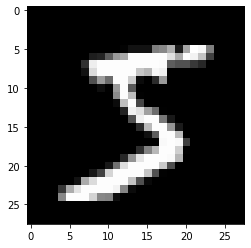

In [48]:
show_image(train_set[0][0])
print('label number is: ' + str(np.where(train_set[0][1] == np.amax(train_set[0][1]))[0]))
plt.show()

# Feed Forward

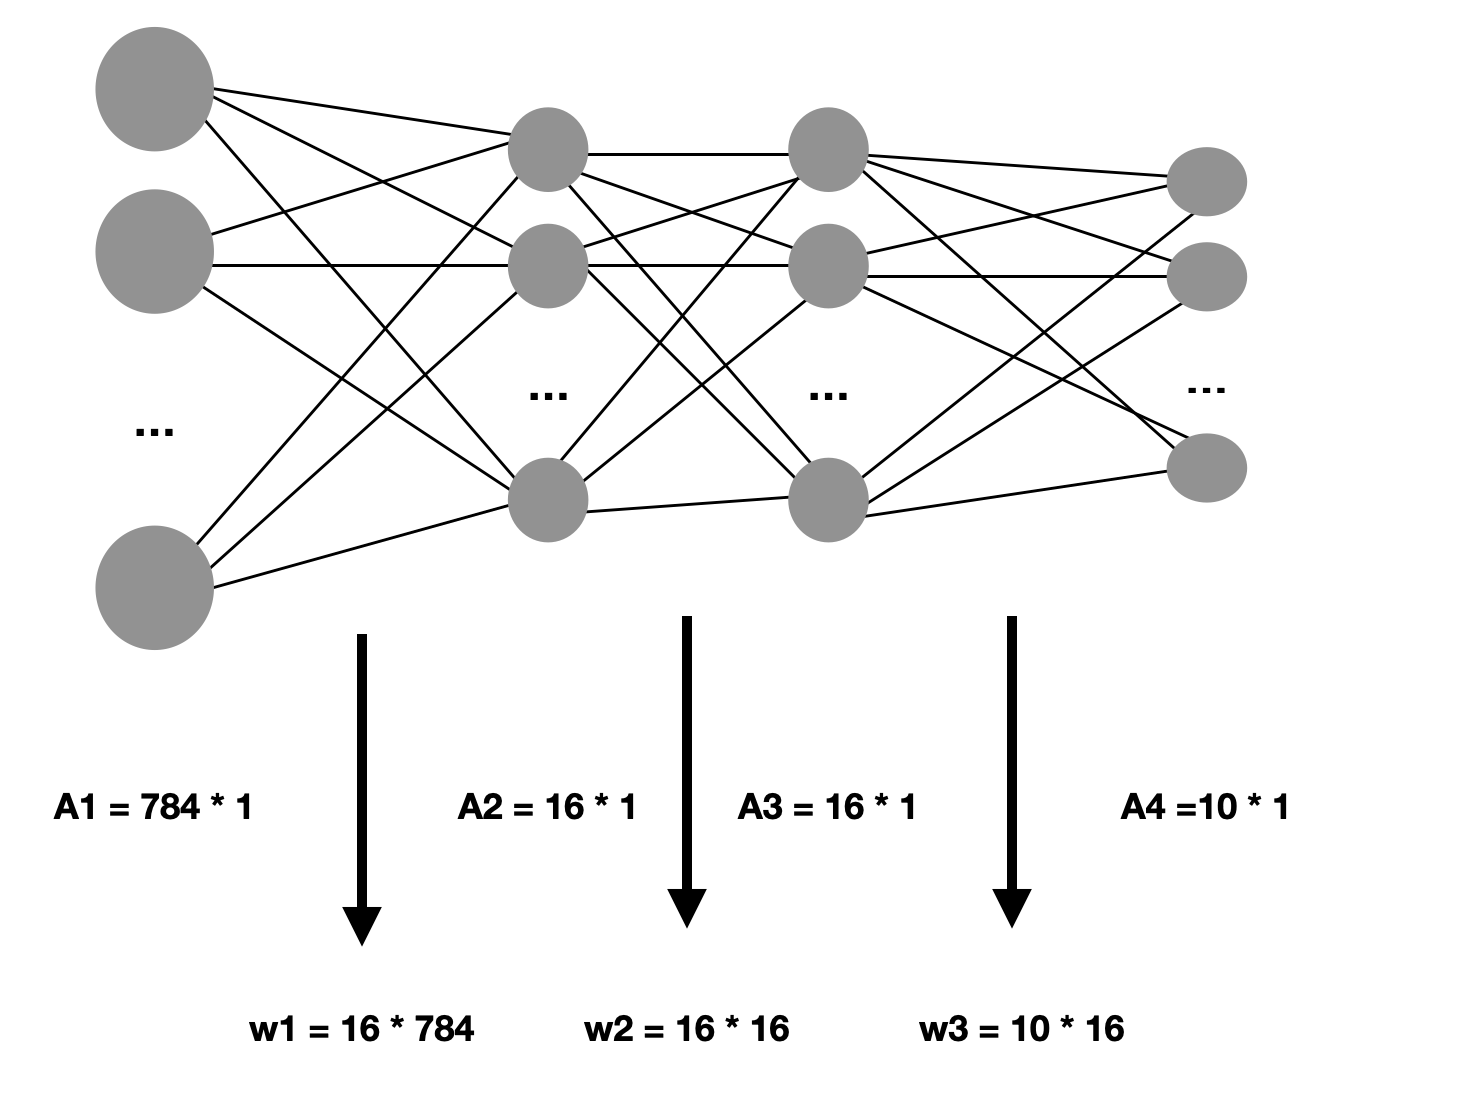

In [13]:
Image(filename = "jupyter-images/neural-networks.png", width = 600, height = 600)

In [16]:
# setting weiths and biases
w1 = np.random.normal(size=(16,784))
w2 = np.random.normal(size=(16,16))
w3 = np.random.normal(size=(10,16))

b1 = np.zeros((16,1))
b2 = np.zeros((16,1))
b3 = np.zeros((10,1))

number_of_train_data = 100

test_for_train_data(number_of_train_data)

Accuracy is: 11.0%


# Backpropagation

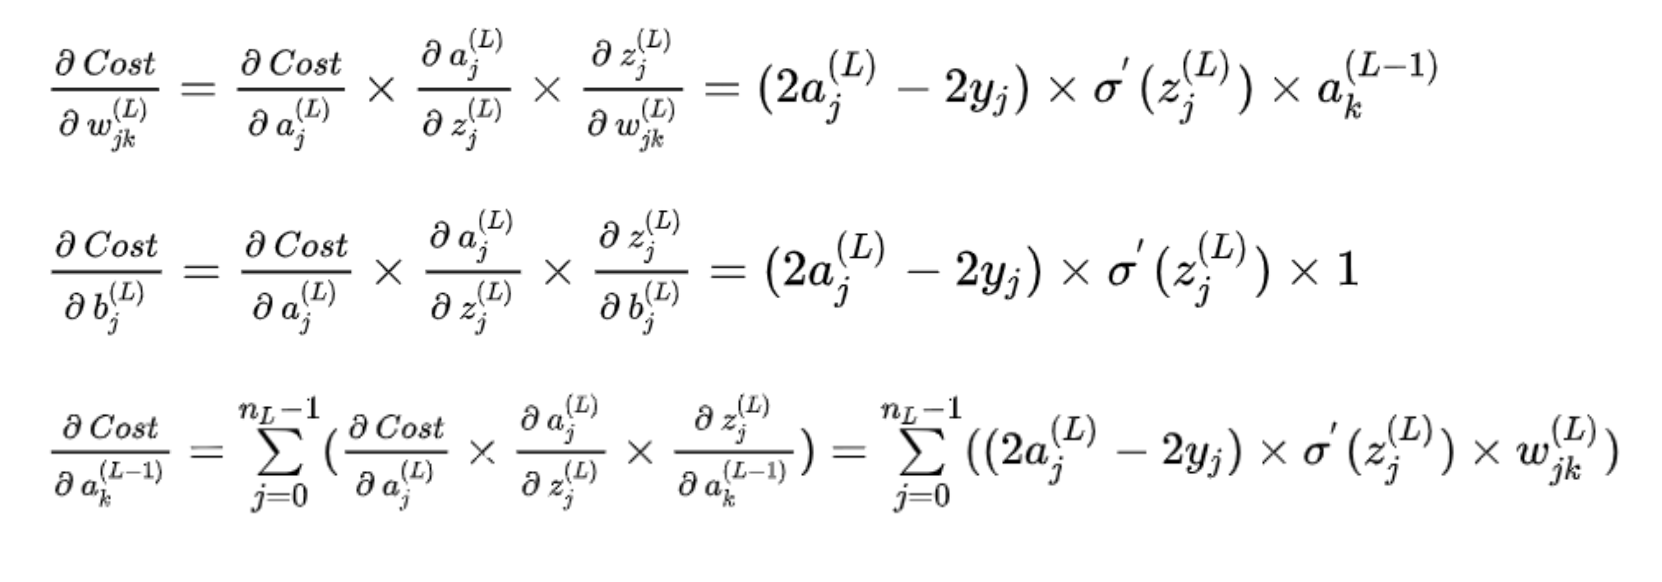

In [17]:
Image(filename = "jupyter-images/back-propagation.png", width = 600, height = 600)

### how does my backpropagation work

Considering the above formulas, this is how I do the backpropagation.

fist you have to initialize the weight and bias for all the layers. then for the each epoch we do the following:
choose your batch size and feed the data to your algorithm step by step. for a batch of data we set the gradians of the weight and biases to zero, then we loop throw the data in a batch and calculate the above values for every perceptron.
for instance for the last layer you have to calculate the gradients of the weights and the gradient of the biases and then the activation of the next layer. 
after doing the above for the whole batch you update the weights and the biases then go throw the next batch.
last but not least, you should calculate the cost for a sigle epoch and then start the second one.

In [30]:
number_of_epochs = 20
learning_rate = 1
batch_size = 10

In [31]:
%%time

batches = []
costs_array = []


# create the batches before starting the loop
for i in range(0, 100, batch_size):
    batches.append(train_set[i : i + batch_size])
    
    
# initializing the weights and biases
w1 = np.random.normal(size=(16,784))
w2 = np.random.normal(size=(16,16))
w3 = np.random.normal(size=(10,16))

b1 = np.zeros((16,1))
b2 = np.zeros((16,1))
b3 = np.zeros((10,1))
        

for epoch in range(number_of_epochs):
    for batch in batches:
        
        grad_w1 = np.zeros((16,784))
        grad_w2 = np.zeros((16,16))
        grad_w3 = np.zeros((10,16))

        grad_b1 = np.zeros((16,1))
        grad_b2 = np.zeros((16,1))
        grad_b3 = np.zeros((10,1))

        
        # go trow data in a single batch
        for data in batch:
            image = data[0]
            label = data[1]
            a2 = sigmoid(w1 @ image + b1)
            a3 = sigmoid(w2 @ a2 + b2)
            a4 = sigmoid(w3 @ a3 + b3)


            ########### layer 4-3
            
            for i in range(10):
                for j in range(16):
                    grad_w3[i, j] += (2 * a4[i, 0] - 2 * label[i, 0]) * sigmoid_derivative(a4[i, 0]) * a3[j, 0]

            for i in range(10):
                    grad_b3[i, 0] += (2 * a4[i, 0] - 2 * label[i, 0]) * sigmoid_derivative(a4[i, 0]) * 1
                    
            
            # activation
            
            activation_3 = np.zeros((16,1))

            for j in range(16):
                for i in range(10):
                    activation_3[j, 0] += (2 * a4[i, 0] - 2 * label[i, 0]) * sigmoid_derivative(a4[i, 0]) * w3[i, j]

                    

            ########### layer 3-2

            for j in range(16):
                for k in range(16):
                    grad_w2[j , k] += activation_3[j, 0] * sigmoid_derivative(a3[j, 0]) * a2[k, 0]


            for j in range(10):
                grad_b2[j , 0] += activation_3[j, 0] * sigmoid_derivative(a3[j, 0]) * 1
                
                
            # activation
            
            activation_2 = np.zeros((16,1))

            for k in range(16):
                for j in range(16):
                    activation_2[k, 0] += activation_3[j, 0] * sigmoid_derivative(a3[j, 0]) * w2[j, k]
                    
                

            ########### layer 2-1

            for k in range(16):
                for m in range(784):
                    grad_w1[k , m] += activation_2[k, 0] * sigmoid_derivative(a2[k, 0]) * image[m, 0]


            for k in range(16):
                grad_b1[k , 0] += activation_2[k, 0] * sigmoid_derivative(a2[k, 0]) * 1


        
        # updating the weights and biases
        
        w1 = w1 - (learning_rate * (grad_w1 / batch_size))
        w2 = w2 - (learning_rate * (grad_w2 / batch_size))
        w3 = w3 - (learning_rate * (grad_w3 / batch_size))

        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
    
    
    
    # calculate the cost for a single epoch
    cost = 0
    for i in range(100):
        a1 = train_set[i][0]
        a2 = sigmoid(w1 @ a1 + b1)
        a3 = sigmoid(w2 @ a2 + b2)
        a4 = sigmoid(w3 @ a3 + b3)
        
        # calculating the cost of a single data
        for j in range(10):
            cost += np.power(a4[j, 0] - train_set[i][1][j, 0], 2)
    
    # calculating the mean of the cost
    cost = cost / 100
    costs_array.append(cost)
     

CPU times: user 1min 32s, sys: 10.8 s, total: 1min 43s
Wall time: 25.9 s


Accuracy is: 67.0%


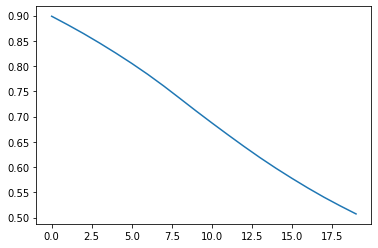

In [32]:
cost_function_plotter(number_of_epochs, costs_array)

number_of_train_data = 100

test_for_train_data(number_of_train_data)

# Vectorization

In [33]:
number_of_epochs = 200
learning_rate = 1
batch_size = 10

In [34]:
%%time

batches = []
costs_array = []


# create the batches before starting the loop
for i in range(0, 100, batch_size):
    batches.append(train_set[i : i + batch_size])
    

# initializing the weights and biases
w1 = np.random.normal(size=(16,784))
w2 = np.random.normal(size=(16,16))
w3 = np.random.normal(size=(10,16))

b1 = np.zeros((16,1))
b2 = np.zeros((16,1))
b3 = np.zeros((10,1))
        

for epoch in range(number_of_epochs):
    for batch in batches:
        
        grad_w1 = np.zeros((16,784))
        grad_w2 = np.zeros((16,16))
        grad_w3 = np.zeros((10,16))

        grad_b1 = np.zeros((16,1))
        grad_b2 = np.zeros((16,1))
        grad_b3 = np.zeros((10,1))

        
        # go trow data in a single batch
        for data in batch:
            image = data[0]
            label = data[1]
            a2 = sigmoid(w1 @ image + b1)
            a3 = sigmoid(w2 @ a2 + b2)
            a4 = sigmoid(w3 @ a3 + b3)
            
            
            
            ########### layer 4-3
                    
            grad_w3 += sigmoid_derivative(a4) * (2 * (a4 - label)) @ np.transpose(a3)
                        
            grad_b3 += 2 * sigmoid_derivative(a4) * (a4 - label)


            ########### layer 3-2

            activation_3 = np.zeros((16,1))
            
            activation_3 += np.transpose(w3) @ (sigmoid_derivative(a4) * (2 * (a4 - label)))

            grad_w2 += sigmoid_derivative(a3) * activation_3 @ np.transpose(a2)

            grad_b2 += sigmoid_derivative(a3) * activation_3



            ########### layer 2-1

            activation_2 = np.zeros((16,1))
            
            activation_2 += np.transpose(w2) @ sigmoid_derivative(a3) * activation_3

            grad_w1 += sigmoid_derivative(a2) * activation_2 @ np.transpose(image)

            grad_b1 += sigmoid_derivative(a2) * activation_2



        # updating the weights and biases
        
        w1 = w1 - (learning_rate * (grad_w1 / batch_size))
        w2 = w2 - (learning_rate * (grad_w2 / batch_size))
        w3 = w3 - (learning_rate * (grad_w3 / batch_size))

        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
    
    
    
    # calculate the cost for a single epoch
    cost = 0
    for i in range(100):
        a1 = train_set[i][0]
        a2 = sigmoid(w1 @ a1 + b1)
        a3 = sigmoid(w2 @ a2 + b2)
        a4 = sigmoid(w3 @ a3 + b3)
        
        # calculating the cost of a single data
        for j in range(10):
            cost += np.power(a4[j, 0] - train_set[i][1][j, 0], 2)
        
    # calculating the mean of the cost
    cost = cost / 100
    costs_array.append(cost)
     

CPU times: user 8.79 s, sys: 1.14 s, total: 9.93 s
Wall time: 2.5 s


Accuracy is: 98.0%


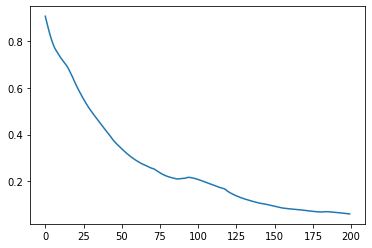

In [36]:
cost_function_plotter(number_of_epochs, costs_array)

number_of_train_data = 100

test_for_train_data(number_of_train_data)

# Test

In [37]:
number_of_epochs = 5
learning_rate = 1
batch_size = 50
number_of_train_data = 60000
number_of_test_data = 10000

In [38]:
%%time

batches = []
costs_array = []

for i in range(0, number_of_train_data, batch_size):
    batches.append(train_set[i : i + batch_size])
    
    
w1 = np.random.normal(size=(16,784))
w2 = np.random.normal(size=(16,16))
w3 = np.random.normal(size=(10,16))

b1 = np.zeros((16,1))
b2 = np.zeros((16,1))
b3 = np.zeros((10,1))
        

for epoch in range(number_of_epochs):
    for batch in batches:
        
        grad_w1 = np.zeros((16,784))
        grad_w2 = np.zeros((16,16))
        grad_w3 = np.zeros((10,16))

        grad_b1 = np.zeros((16,1))
        grad_b2 = np.zeros((16,1))
        grad_b3 = np.zeros((10,1))

        for data in batch:
            image = data[0]
            label = data[1]
            a2 = sigmoid(w1 @ image + b1)
            a3 = sigmoid(w2 @ a2 + b2)
            a4 = sigmoid(w3 @ a3 + b3)
            
            # layer 4-3
                    
            grad_w3 += sigmoid_derivative(a4) * (2 * (a4 - label)) @ np.transpose(a3)
                        
            grad_b3 += 2 * sigmoid_derivative(a4) * (a4 - label)


            # layer 3-2

            activation_3 = np.zeros((16,1))
            activation_3 += np.transpose(w3) @ (sigmoid_derivative(a4) * (2 * (a4 - label)))

            grad_w2 += sigmoid_derivative(a3) * activation_3 @ np.transpose(a2)

            grad_b2 += sigmoid_derivative(a3) * activation_3



            # layer 2-1

            activation_2 = np.zeros((16,1))
            activation_2 += np.transpose(w2) @ sigmoid_derivative(a3) * activation_3

            grad_w1 += sigmoid_derivative(a2) * activation_2 @ np.transpose(image)

            grad_b1 += sigmoid_derivative(a2) * activation_2



        w1 = w1 - (learning_rate * (grad_w1 / batch_size))
        w2 = w2 - (learning_rate * (grad_w2 / batch_size))
        w3 = w3 - (learning_rate * (grad_w3 / batch_size))

        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
    
    
    
    cost = 0
    for i in range(number_of_train_data):
        a1 = train_set[i][0]
        a2 = sigmoid(w1 @ a1 + b1)
        a3 = sigmoid(w2 @ a2 + b2)
        a4 = sigmoid(w3 @ a3 + b3)
        
        for j in range(10):
            cost += np.power(a4[j, 0] - train_set[i][1][j, 0], 2)
        
    cost = cost / number_of_train_data
    costs_array.append(cost)
    

CPU times: user 2min 7s, sys: 16.8 s, total: 2min 24s
Wall time: 36.4 s


Accuracy is: 84.18333333333334%


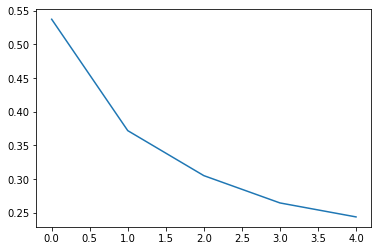

In [39]:
cost_function_plotter(number_of_epochs, costs_array)
    
test_for_train_data(number_of_train_data)

Accuracy is: 84.61%


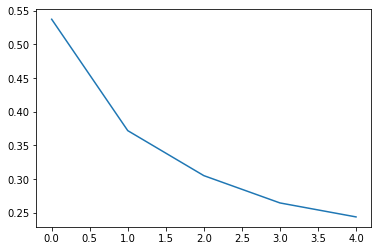

In [40]:
cost_function_plotter(number_of_epochs, costs_array)

test_for_test_data(number_of_test_data)

# Shifting Images

In [41]:
# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

new_test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    new_test_set.append((image, label))

In [42]:
# new test set for the shifted images
new2_test_set = []
    
for n in range(num_of_test_images):
    new_image = shift_image(new_test_set[n][0].reshape(28,28), 4, 0)
    new_image = new_image.reshape(784,1)
    
    new2_test_set.append((new_image, new_test_set[n][1]))

label number is: [7]


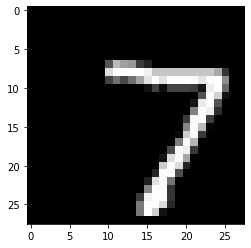

In [46]:
show_image(new2_test_set[0][0])
print('label number is: ' + str(np.where(new2_test_set[0][1] == np.amax(new2_test_set[0][1]))[0]))
plt.show()

In [47]:
test_for_shifted_test_data(number_of_test_data)

Accuracy is: 27.99%


# Tanh activation function

In [49]:
%%time

batches = []
costs_array = []

for i in range(0, number_of_train_data, batch_size):
    batches.append(train_set[i : i + batch_size])
    
    
w1 = np.random.normal(size=(16,784))
w2 = np.random.normal(size=(16,16))
w3 = np.random.normal(size=(10,16))

b1 = np.zeros((16,1))
b2 = np.zeros((16,1))
b3 = np.zeros((10,1))
        

for epoch in range(number_of_epochs):
    for batch in batches:
        
        grad_w1 = np.zeros((16,784))
        grad_w2 = np.zeros((16,16))
        grad_w3 = np.zeros((10,16))

        grad_b1 = np.zeros((16,1))
        grad_b2 = np.zeros((16,1))
        grad_b3 = np.zeros((10,1))

        for data in batch:
            image = data[0]
            label = data[1]
            a2 = np.tanh(w1 @ image + b1)
            a3 = np.tanh(w2 @ a2 + b2)
            a4 = np.tanh(w3 @ a3 + b3)
            
            # layer 4-3
                    
            grad_w3 += tanh_derivative(a4) * (2 * (a4 - label)) @ np.transpose(a3)
                        
            grad_b3 += 2 * tanh_derivative(a4) * (a4 - label)


            # layer 3-2

            activation_3 = np.zeros((16,1))
            activation_3 += np.transpose(w3) @ (tanh_derivative(a4) * (2 * (a4 - label)))

            grad_w2 += tanh_derivative(a3) * activation_3 @ np.transpose(a2)

            grad_b2 += tanh_derivative(a3) * activation_3



            # layer 2-1

            activation_2 = np.zeros((16,1))
            activation_2 += np.transpose(w2) @ tanh_derivative(a3) * activation_3

            grad_w1 += tanh_derivative(a2) * activation_2 @ np.transpose(image)

            grad_b1 += tanh_derivative(a2) * activation_2



        w1 = w1 - (learning_rate * (grad_w1 / batch_size))
        w2 = w2 - (learning_rate * (grad_w2 / batch_size))
        w3 = w3 - (learning_rate * (grad_w3 / batch_size))

        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
    
    
    
    cost = 0
    for i in range(number_of_train_data):
        a1 = train_set[i][0]
        a2 = np.tanh(w1 @ a1 + b1)
        a3 = np.tanh(w2 @ a2 + b2)
        a4 = np.tanh(w3 @ a3 + b3)
        
        for j in range(10):
            cost += np.power(a4[j, 0] - train_set[i][1][j, 0], 2)
        
    cost = cost / number_of_train_data
    costs_array.append(cost)
    

CPU times: user 2min 5s, sys: 19 s, total: 2min 24s
Wall time: 36.8 s


Accuracy is: 10.551666666666666%


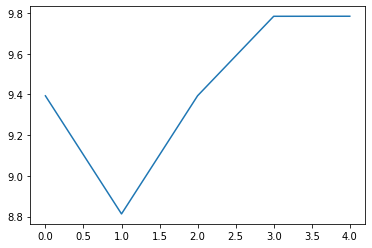

In [50]:
cost_function_plotter(number_of_epochs, costs_array)
    
test_for_train_data(number_of_train_data)

Accuracy is: 10.4%


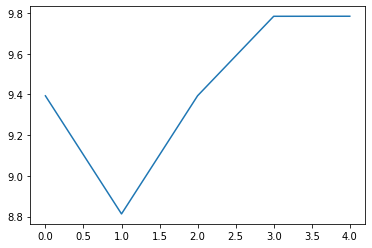

In [51]:
cost_function_plotter(number_of_epochs, costs_array)

test_for_test_data(number_of_test_data)